In [1]:
#v3 innclude NN
import os
import pickle
import pandas as pd
import numpy as np
from helper_functions.clean_transitions import clean_transition_column
from helper_functions.simulate_game import simulate_game
from helper_functions.combine_matrices import combine_team_matrix
from helper_functions.tourney_sim import matchup
import time
from matplotlib import pyplot as plt
#troubleshooting simulate game

100%|██████████| 1378/1378 [00:10<00:00, 129.37it/s]


In [2]:
all_models = []
for x in os.listdir('models'):
    with open('models/{}'.format(x), 'rb') as file:
        y=pickle.load(file)
    all_models.append(y)

In [3]:
def clean_result(sim_game, over_under, a_margin):
    """
    Takes simulated game and produces relevant lines
    """
    totals = []
    for item in sim_game:
        totals.append(item[0]+item[1])

    t_array=np.array(totals)
    under_prob= np.mean(t_array<over_under)
    over_prob= np.mean(t_array>over_under)

    if (under_prob<.6)and(over_prob)<.6:
        print('Over-Under Wash')
        print()

    else:
        print('Over {} probabilty: {}%'.format(over_under, np.round(100*over_prob, 1)))
        print('Under {} probabilty: {}%'.format(over_under, np.round(100*under_prob, 1)))
        print()

    margins = []
    for aaa in sim_game:
        margins.append(aaa[0]-aaa[1])

    margins_b = []
    for aaa in sim_game:
        margins_b.append(aaa[1]-aaa[0])

    a_cover = np.mean(np.array(margins)>a_margin)
    b_cover = np.mean(np.array(margins_b) > -a_margin)

    if (a_cover<.6)and(b_cover<.6):
        print('Spread Wash')
        print()

    else:
        print('Team A cover {} probability: {}%'.format(-a_margin, np.round(100*a_cover, 1)))
        print('Team B cover {} probability: {}%'.format(a_margin, np.round(100*b_cover, 1)))
        print()

    a_win = np.mean([x[0]>x[1] for x in sim_game])

    print('Team A win probability: {}%'.format(np.round(100*a_win, 1)))
    print('Team B win probability: {}%'.format(np.round(100*(1-a_win), 1)))

    
    

In [4]:
#if one team does not have data for a certain starting state, we will get a row of nan's which will break the code.
#if this occurs, we can just substitute the average probability for this row?
avg_matrix = pd.read_excel('avg_transition_matrix_with_manual_edits.xlsx', sheet_name = 'Mean Pasted', index_col='Starting_State')

In [109]:
team_A = "Illinois"
team_B = "Duquesne"
OU = 146
team_A_margin = 4.5

In [110]:
mat_A = pd.read_excel("team_specific_matrix/{}_A.xlsx".format(team_A), index_col = 'Starting_State')
mat_B = pd.read_excel("team_specific_matrix/{}_B.xlsx".format(team_B), index_col = 'Starting_State')

In [111]:
transition_matrix = combine_team_matrix(mat_A, mat_B)

In [112]:
all_scores = []
abc=simulate_game(transition_matrix, 1000)
for score in abc[1]:
    x=score[0]-5
    y=score[1]-5
    all_scores.append((x,y))
for model in all_models:
    geb=matchup(team_A, team_B, strategy='nn', reps=1000, model=model)
    all_scores += geb

In [113]:
clean_result(all_scores, OU, team_A_margin)

Over-Under Wash

Spread Wash

Team A win probability: 65.2%
Team B win probability: 34.8%


In [28]:
margins = []
for aaa in all_scores:
    margins.append(aaa[0]-aaa[1])

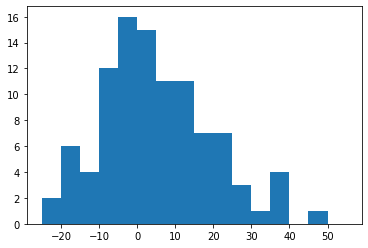

In [29]:
plt.hist(margins, bins=np.linspace(-25,55,17));

In [30]:
np.mean(margins)

4.54

In [31]:
np.median(margins)

4.0

In [20]:
np.mean([x[0]>x[1] for x in abc[1]])

0.656

In [32]:
np.quantile(margins, [.1,.2,.3,.4,.5,.6,.7,.8,.9])

array([-13.1,  -7. ,  -4. ,   0.2,   4. ,   7. ,  10. ,  16.2,  23.1])